Primer empleo

In [20]:

import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from xlsxwriter import Workbook

plt.figure(figsize=(15,30))
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

path=r'Datos.xlsx'

# Cargue y lectura de los datos

In [21]:
data = pd.read_csv('empleo.csv')

# Encabezado de datos

In [22]:
data.head()

,Tipo Documento,Canal de Registro,Edad,Género,Nivel de Estudio,Título Homologado,Ciudad de Residencia,Fecha Registro,Programa de Gobierno,Condiciones Especiales,Situación Laboral,Fecha Actualización,Zona,Mes,Año,Punto Atención,Rango Edad
0,Cédula de Ciudadanía,Agencia,39,F,Media(10-13),BACHILLER ACADÉMICO,BARRANQUILLA,03/01/2020 02:22:50 p.m.,NaN,NaN,Desempleado,03/01/2020 02:22:50 p.m.,Urbano,1,"2,020",Barrios Modelo,29 - 39
1,Cédula de Ciudadanía,Agencia,40,F,Universitaria,ENFERMERA,BARRANQUILLA,07/01/2020 08:29:56 a.m.,NaN,NaN,Desempleado,07/01/2020 08:29:56 a.m.,Urbano,1,"2,020",Barrios Modelo,40 - 50
2,Cédula de Ciudadanía,Agencia,24,M,Técnica Profesional,OPERACIÓN DE PROCESOS INDUSTRIALES,BARRANQUILLA,07/01/2020 10:23:32 a.m.,NaN,NaN,Primer Empleo,07/01/2020 10:23:32 a.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
3,Cédula de Ciudadanía,Agencia,22,M,Media(10-13),BACHILLER ACADEMICO,BARRANQUILLA,07/01/2020 11:04:52 a.m.,NaN,NaN,Desempleado,07/01/2020 11:04:52 a.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
4,Cédula de Ciudadanía,Agencia,23,F,Universitaria,INGENIERA AMBIENTAL,BARRANQUILLA,09/01/2020 09:48:22 a.m.,NaN,NaN,Desempleado,09/01/2020 09:48:22 a.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28


# ver valores nulos

In [23]:
data.isnull().sum()

Tipo Documento                0
Canal de Registro             0
Edad                          0
Género                        0
Nivel de Estudio            372
Título Homologado           375
Ciudad de Residencia          5
Fecha Registro                0
Programa de Gobierno      16217
Condiciones Especiales    16558
Situación Laboral             5
Fecha Actualización           0
Zona                        363
Mes                           0
Año                           0
Punto Atención                0
Rango Edad                    0
dtype: int64

# Encontrar quienes estan en primer empleo en la base de datos


In [24]:
data['Situación Laboral']=='Primer Empleo'

0        False
1        False
2         True
3        False
4        False
         ...  
17215     True
17216    False
17217    False
17218    False
17219    False
Name: Situación Laboral, Length: 17220, dtype: bool

# verificando la informacion

In [25]:
data[data['Situación Laboral']=='Primer Empleo']

,Tipo Documento,Canal de Registro,Edad,Género,Nivel de Estudio,Título Homologado,Ciudad de Residencia,Fecha Registro,Programa de Gobierno,Condiciones Especiales,Situación Laboral,Fecha Actualización,Zona,Mes,Año,Punto Atención,Rango Edad
2,Cédula de Ciudadanía,Agencia,24,M,Técnica Profesional,OPERACIÓN DE PROCESOS INDUSTRIALES,BARRANQUILLA,07/01/2020 10:23:32 a.m.,NaN,NaN,Primer Empleo,07/01/2020 10:23:32 a.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
13,Cédula de Ciudadanía,Agencia,17,M,Técnica Laboral,tecnico laborar por competencias auxiliar de g...,BARRANQUILLA,08/01/2020 10:58:00 a.m.,NaN,NaN,Primer Empleo,08/01/2020 10:58:00 a.m.,Urbano,1,"2,020",Barrios Modelo,MENOR DE EDAD
27,Cédula de Ciudadanía,Autoregistro,21,F,Media(10-13),Media,SOLEDAD,15/01/2020 07:47:12 p.m.,NaN,NaN,Primer Empleo,15/01/2020 07:47:12 p.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
33,Cédula de Ciudadanía,Autoregistro,23,M,Universitaria,Psicólogo,BARRANQUILLA,17/01/2020 06:15:41 p.m.,NaN,NaN,Primer Empleo,17/01/2020 06:15:41 p.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
40,Cédula de Ciudadanía,Agencia,23,F,Media(10-13),BACHILLER ACADEMICO,BARRANQUILLA,22/01/2020 02:48:08 p.m.,NaN,NaN,Primer Empleo,22/01/2020 02:48:08 p.m.,Urbano,1,"2,020",Barrios Modelo,18 - 28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17148,Cédula de Ciudadanía,Autoregistro,28,F,Tecnológica,TECNOLOGO EN ANÁLISIS Y DESARROLLO DE SISTEMAS...,BARRANQUILLA,23/12/2021 08:12:40 p.m.,NaN,NaN,Primer Empleo,23/12/2021 08:12:40 p.m.,Rural,12,"2,021",Barrio Altos de Riomar,18 - 28
17171,Cédula de Ciudadanía,Autoregistro,18,F,Técnica Laboral,Técnico en Auxiliar Administrativo,BARRANQUILLA,27/12/2021 02:58:47 p.m.,NaN,NaN,Primer Empleo,27/12/2021 02:58:47 p.m.,Urbano,12,"2,021",Bario 7 de abril,18 - 28
17176,Cédula de Ciudadanía,Autoregistro,22,F,NaN,NaN,BARRANQUILLA,27/12/2021 09:29:39 p.m.,NaN,NaN,Primer Empleo,27/12/2021 09:29:39 p.m.,Urbano,12,"2,021",Barrio Altos de Riomar,18 - 28
17193,Cédula de Ciudadanía,Autoregistro,22,F,Universitaria,Fisioterapeuta,BARRANQUILLA,29/12/2021 08:24:46 a.m.,NaN,NaN,Primer Empleo,29/12/2021 08:24:46 a.m.,Urbano,12,"2,021",Barrio Simón Bolívar,18 - 28


# Creando nuevo dataframe

In [26]:
newdata=data.copy

#Guardando datos filtrados en el nuevo dataframe 

In [27]:
ndata=data[data['Situación Laboral']=='Primer Empleo']

Renombrar encabezados

In [28]:
mdatos =ndata.rename (columns={
    "Tipo Documento" :"Tipo_Documento",
    "Canal de Registro":"Canal_Registro",
    "Edad":"Edad",
    'Género': 'Genero',
    "Nivel de Estudio": "Nivel_Estudio",
    'Título Homologado' :'Titulo_Homologado',
    'Ciudad de Residencia':'Ciudad_Residencia',
    'Fecha Registro':'Fecha_Registro',
    'Programa de Gobierno':'Programa_Gobierno',
    'Condiciones Especiales':'Condiciones_Especiales',
    'Situación Laboral':'Situación_Laboral',
    'Fecha Actualización':'Fecha_Actualizacion',
    'Zona':'Zona',
    'Mes':'Mes',
    'Año':"anio",
    'Punto Atención':'Punto_Atencion',
    'Rango Edad':'Rango_Edad'
})

mdatos.columns

Index(['Tipo_Documento', 'Canal_Registro', 'Edad', 'Genero', 'Nivel_Estudio',
       'Titulo_Homologado', 'Ciudad_Residencia', 'Fecha_Registro',
       'Programa_Gobierno', 'Condiciones_Especiales', 'Situación_Laboral',
       'Fecha_Actualizacion', 'Zona', 'Mes', 'anio', 'Punto_Atencion',
       'Rango_Edad'],
      dtype='object')

Guardar en xlsx

In [29]:
'''writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
ndata.to_excel(writer, sheet_name = 'Dframe')
writer.save()
writer.close()

print(ndata.columns)'''

"writer = pd.ExcelWriter(path, engine = 'xlsxwriter')\nndata.to_excel(writer, sheet_name = 'Dframe')\nwriter.save()\nwriter.close()\n\nprint(ndata.columns)"

# Grafica de porcentaje por Genero

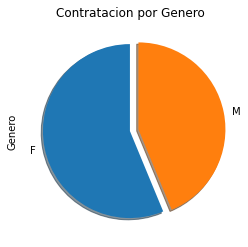

In [30]:
mdatos.Genero.value_counts().plot.pie(explode =[0,0.1] , shadow =True,startangle=90)
plt.title('Contratacion por Genero')
plt.show()


En la grafica anterior podemos apreciar que el numero de mujeres atendidas y consuguieron empleo estos dos ultimos años fue mayor al numero de hombres  .

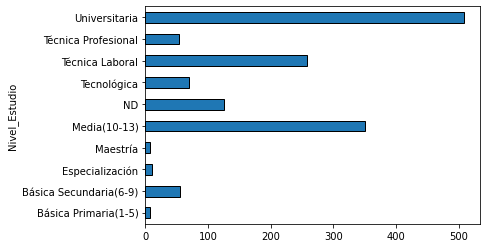

<Figure size 2880x720 with 0 Axes>

In [31]:
valor_porcarrera = mdatos.groupby("Nivel_Estudio")["Tipo_Documento"].count()
valor_porcarrera.head(20).plot.barh(edgecolor='black')
plt.figure(figsize=(40,10))
plt.show()

Grafico de personas empleadass organizadass por su nivel de estudios , se encuntra agrupada con la informacion de estos dos ultimos años de pandemia (2020 - 2021)

# creacion de dataframe para cada año de pandemia 

In [32]:

anio2021=mdatos[mdatos['anio']=="2,021"]
anio2020=mdatos[mdatos['anio']=="2,020"]


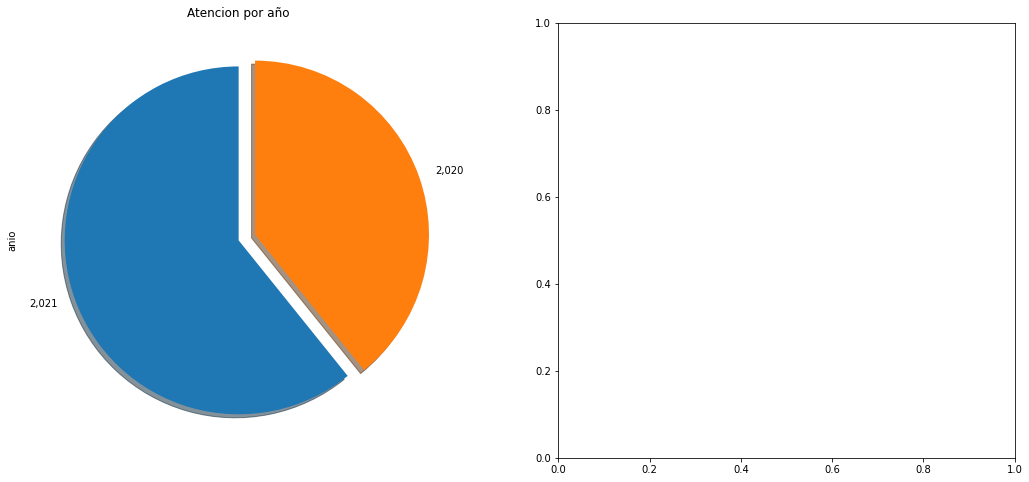

In [33]:
f , ax =plt.subplots(1,2, figsize =(18,8))
mdatos['anio'].value_counts().plot.pie(explode =[0,0.1] ,ax =ax [0], shadow =True,startangle=90,)
ax[0].set_title('Atencion por año')
plt.show()


# Histograma por año 2020 y 2021 sobre personas contratadas durante cada mes de cada año

<function matplotlib.pyplot.show(close=None, block=None)>

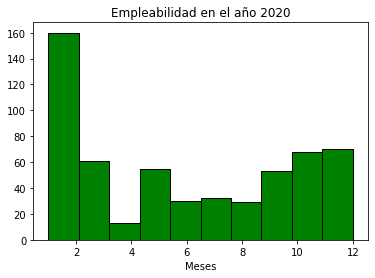

In [34]:
anio2020.Mes.plot.hist(edgecolor='black',color='Green')
plt.title ('Empleabilidad en el año 2020')
plt.xlabel('Meses')
plt.ylabel('')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

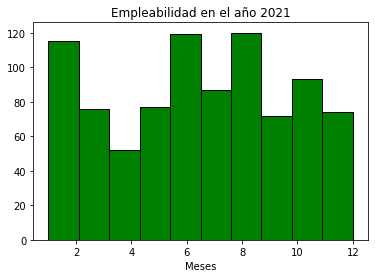

In [35]:
anio2021.Mes.plot.hist(edgecolor='black',color='Green')
plt.title ('Empleabilidad en el año 2021')
plt.xlabel('Meses')
plt.ylabel('')
plt.show

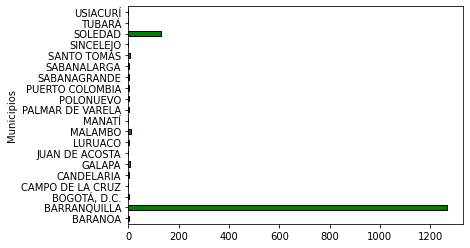

<Figure size 720x288 with 0 Axes>

In [45]:

valor_por_ciudad = mdatos.groupby("Ciudad_Residencia")["Situación_Laboral"].count()
valor_por_ciudad.head(20).plot.barh(edgecolor="black",color="green")
plt.ylabel("Municipios")
plt.figure(figsize=(10,4))
plt.show()
